## Imports for the program (Original program by Josh Lozjim and edited by Hayden Fuss, this version by Jeremy McKenzie)

In [22]:
%matplotlib inline
import matplotlib
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

time_fmt declares the format for the time data
year_data declares an empty hash, and the for loop creates further hashes (think: vectors) assigned to the keys of '2012' and '2013'

In [23]:
time_fmt = "%m/%d/%Y %H:%M"

years = ('2012', '2013')

year_data = {}
filename = raw_input("Enter the file name to read data from: ")
#filename = sys.stdin.readline()
print filename
outputfile = raw_input("Enter the file name to write data to: ")
#outputfile = sys.stdin.readline()
print outputfile
filename = filename.rstrip("\n")
outputfile = outputfile.rstrip("\n")
prefix = raw_input("Enter prefix: ")
#outputfile = sys.stdin.readline()
print outputfile
prefix = prefix.rstrip("\n")

daysWeek = {12:'Fri', 13:'Sat', 14:'Sun', 15:'Mon', 16:'Tue', 17:'Wed', 18:'Thu', 19:'Fri', 20:'Sat', 21:'Sun',
            22:'Mon', 23:'Tues'}

Enter the file name to read data from: 911_2012_2013.csv
911_2012_2013.csv
Enter the file name to write data to: total_shift.png
total_shift.png
Enter prefix: 911
total_shift.png


This portion of the program builds the data list, organized by month, in a list called emergency. It runs through the list, pulling dates from the csv file, and then counts the number of times any particular month (and thereby the amount of calls in that month) comes up. If a month has not previously been encountered, it is added to the list and given a count of one. Otherwise, it's incremented by one.

In [24]:
with open(filename) as csvfile:
    nineOne = csv.DictReader(csvfile)
        # for all the 911 calls the reader finds
    for e in nineOne:
        if e['ENTRY_DT'] != '':
            date = time.strptime(e['ENTRY_DT'], time_fmt) # converts string version of date into a date object
            if not date.tm_year in year_data.keys():
                year_data[date.tm_year] = {}
            y = date.tm_year
            d = date.tm_mday
            if y == 2012:
                d -= 1
            if date.tm_mon == 4 and d in range (12,23):
                if not d in year_data[y].keys():
                    year_data[y][d] = 1
                else:
                    year_data[y][d] += 1
                """if not d in year_data[y].keys():
                    year_data[y][d] = {'AM':0, 'PM':0}
                if date.tm_hour < 12:                
                    year_data[y][d]['AM'] += 1
                else:
                    year_data[y][d]['PM'] += 1"""

for day in year_data[2012].keys():
    if not day in year_data[2013].keys():
        year_data[2013][day] = 0
        """for each in ('AM', 'PM'):
            year_data[2013][day][each] = 0"""
        
for day in year_data[2013].keys():
    if not day in year_data[2012].keys():
        year_data[2012][day] = 0
        """for each in ('AM', 'PM'):
            year_data[2012][day][each] = 0"""

This section adjusts the data to plot-friendly tuples (again, like vectors) while the last line ensures that the bar will not be overrun by the data. It does this by finding the largest humber in either list, divides that by decimal 1000, rounds that up and converts to an integer, and mutiplies that by 1000.

In [25]:
ind=np.arange(len(year_data[2012])) # add in *2 later for AM/PM
width=.35

tick_labels = []
top_labels = []

counts_2012 = []

for apr_day in sorted(year_data[2012]):
    counts_2012.append(year_data[2012][apr_day])
    tick_labels.append(daysWeek[apr_day])
    top_labels.append("4/" + str(apr_day))
    
counts_2013 = []

for apr_day in sorted(year_data[2013]):
    counts_2013.append(year_data[2013][apr_day])

maxCount = int(math.ceil(max(counts_2012 + counts_2013) / 1000.0)) * 1000

This is the section that organizes the bar graph itself.
The last function puts a label with the exact number on the top of the bar graph

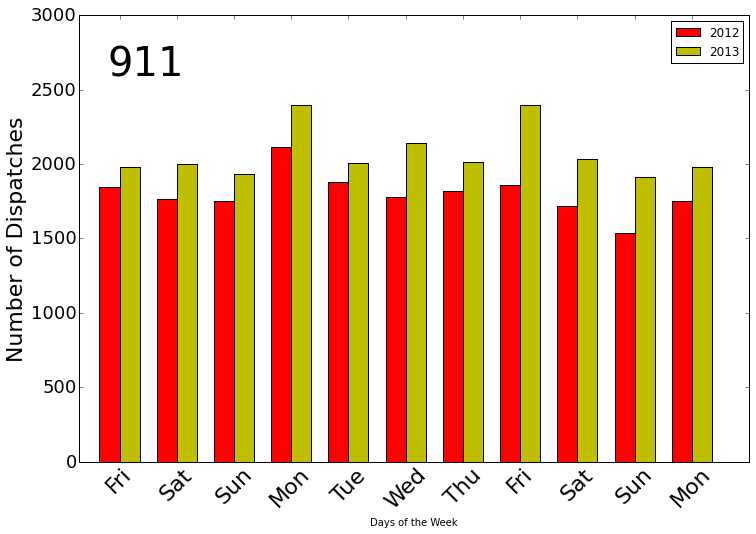

In [26]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#axTop = ax.twiny()

rects1 = ax.bar(ind, counts_2012, width, color='r')

rects2 = ax.bar(width+ind, counts_2013, width, color='y')

ax.set_xlim(-width, len(ind) + width)
#axTop.set_xlim(-width, len(ind) + width)
ax.set_ylim(0, maxCount)
ax.set_ylabel('Number of Dispatches', fontsize=22)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
#axTop.set_xlabel('Dates in 2013')
ax.set_xlabel('Days of the Week')
# ax.set_title('911 Call Volume by half-day (April)')
ax.set_xticks(ind+width)
#axTop.set_xticks(ind+width)

tickNames = ax.set_xticklabels(tick_labels)
#topNames = axTop.set_xticklabels(top_labels)
plt.setp(tickNames, rotation=45, fontsize=22)
#plt.setp(topNames, rotation=45, fontsize=10)

ax.legend((rects1[0], rects2[0]), years)

ax.text(width-width/2, 2600, prefix.title(), fontsize=40)

def autolabel(rects):
# attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
            ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

plt.savefig(outputfile, dpi=96)
plt.show()